**NON LINEAR REGRESSION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.arange(-5.0,5.0,0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)

This uses NumPy's random.normal function to generate random numbers from a normal (Gaussian) distribution.
The size=x.size argument specifies the number of random numbers to generate, and it is set to the size of the array or sequence x.
Essentially, it generates an array of random numbers with the same size as x.

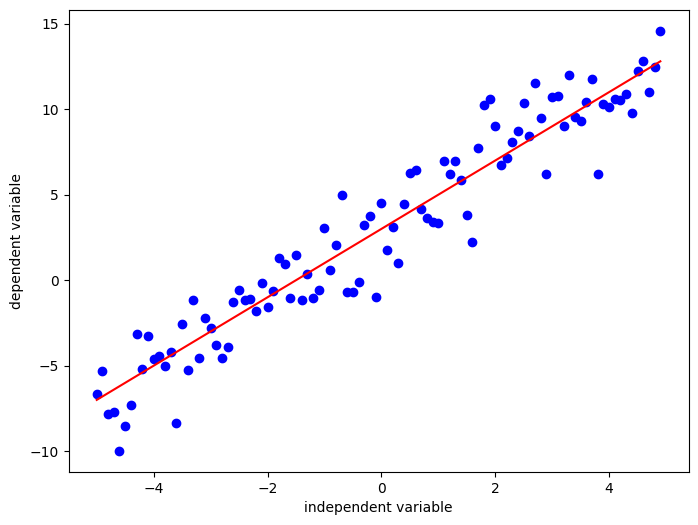

In [ ]:
ydata= y + y_noise
plt.figure(figsize = (8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x, y,'r')
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.show()

cubic graph

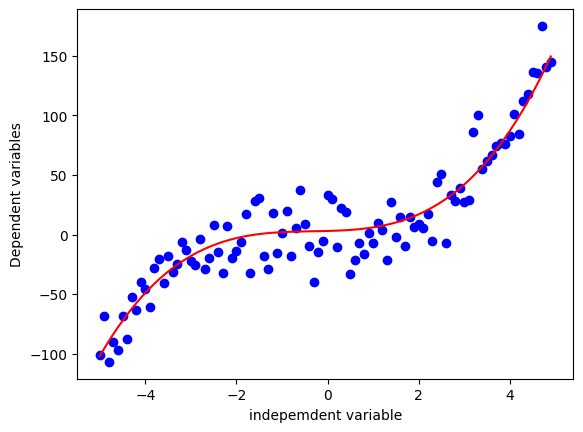

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = 1*(x**3) + 1*(x**2) + 1*x +3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent variables")
plt.xlabel("indepemdent variable")
plt.show()

quadratic graph

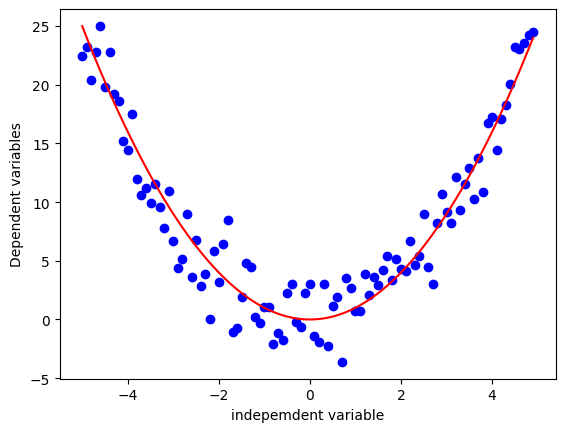

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent variables")
plt.xlabel("indepemdent variable")
plt.show()

exponential

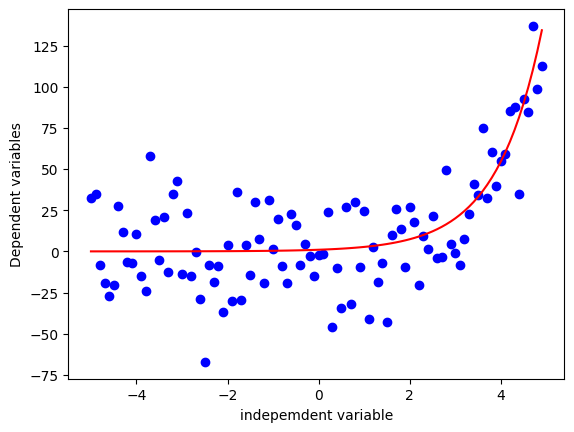

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent variables")
plt.xlabel("indepemdent variable")
plt.show()

logarithmic

<ipython-input-17-7ff434cdd26a>:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


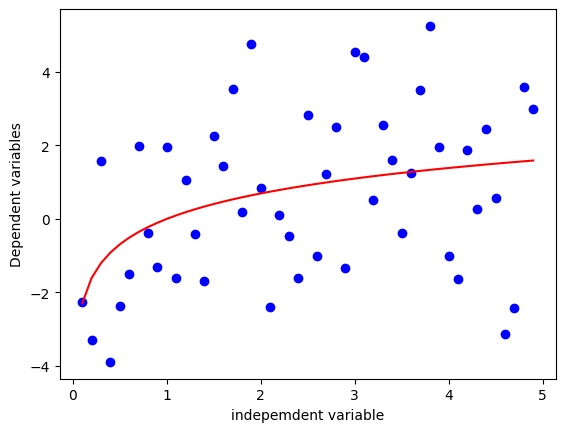

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = np.log(x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent variables")
plt.xlabel("indepemdent variable")
plt.show()

sigmoidal

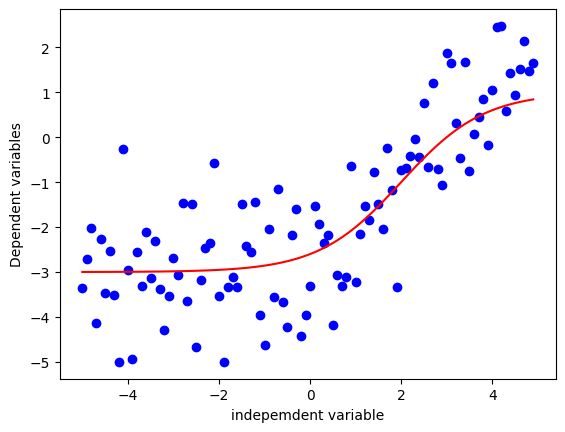

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = 1-4/(1+np.power(3,x-2))
y_noise = 1 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent variables")
plt.xlabel("indepemdent variable")
plt.show()

**example from dataset**

In [ ]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

2024-02-17 19:06:40 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


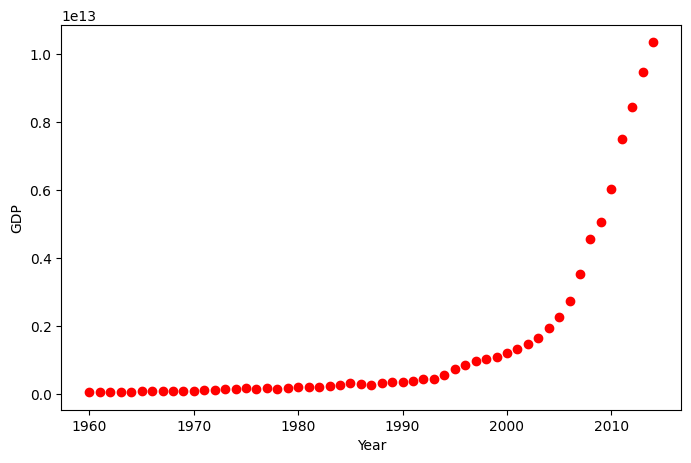

In [ ]:
plt.figure(figsize=(8,5))
x_data , y_data = (df["Year"].values , df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
#normalize data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
print(x_data , y_data)
print(xdata , ydata)

In [ ]:
from scipy.optimize import curve_fit
popt , pocv = curve_fit(sigmoid, xdata, ydata)
print(popt , pocv)

[690.45170921   0.99720713] [[ 1.52271497e+03 -2.88118980e-04]
 [-2.88118980e-04  7.25961452e-09]]


In [ ]:
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


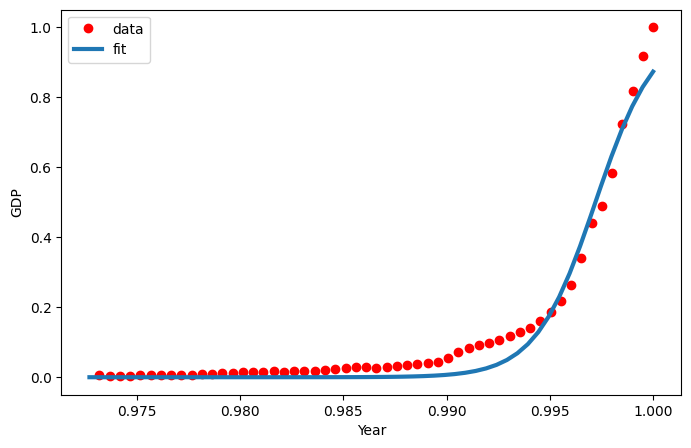

In [ ]:
x = np.linspace(1960,2015,55)
x=x/max(x)
plt.figure(figsize=(8,5))

#predicting
y=sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
#calculating accuracy

msk=np.random.rand(len(df))<0.8
train_x = xdata[msk]
train_y = ydata[msk]
test_x = xdata[~msk]
test_y = ydata[~msk]

popt,pocv = curve_fit(sigmoid, train_x, train_y)
y_pred = sigmoid(test_x, *popt)

print("mean absolute error : %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("residual sum of squares : %.2f" % np.mean((y_pred - test_y)**2))
from sklearn.metrics import r2_score
print("r2 score is : %.2f" % r2_score(test_y, y_pred))

mean absolute error : 0.03
residual sum of squares : 0.00
r2 score is : 0.98
